In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

Importing packages and loading data
Exploring the data and completing the cleaning process
Building a binomial logistic regression model
Evaluating a binomial logistic regression model using a confusion matrix

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; seaborn.set()

In [4]:
#Loading the data set
df=pd.read_csv('Invistico_Airline.csv')

## Data exploration and cleaning

In [6]:
#Checking the first five rows of the dataset
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [7]:
#Checking info of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [10]:
#Checking summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [11]:
#checcking summary stats for categorical values
df.describe(include='object')

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


In [13]:
#checking for null values
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

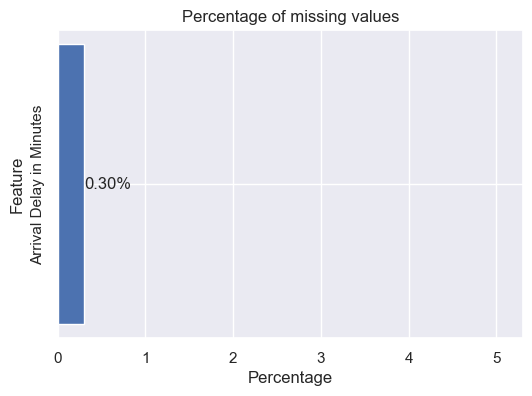

In [84]:
#Calculating percentage of missing value
missing_columns=df.isnull().sum()
missing_percentage= missing_columns[missing_columns>0]/df.shape[0]*100
fig,ax=plt.subplots(figsize=(6,4))
ax.barh(missing_percentage.index,missing_percentage)   

#Add labels to the bars
for i,(value,index) in enumerate(zip(missing_percentage,missing_percentage.index)):
    ax.text(value,i,f'{value:.2f}%',va='center')
#adding labels and titles
plt.title('Percentage of missing values')
ax.set_xlabel('Percentage')
ax.set_ylabel('Feature')
plt.yticks(rotation=90,va='center')
ax.set_xlim(0,max(missing_percentage)+5)
#Display the chart
plt.show()

        

In [85]:
#removing null values
df.dropna(axis=0,inplace=True)

Since the null value percentage is quite low, decision was made to omit the null values from the data set.

In [87]:
#Checking the shape to insure null values have been removed
df.shape

(129487, 22)

In [90]:
#Checking the duplicates
df.duplicated().any()

False

In [92]:
#Checking columns of data frame
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [93]:
#removing inconsistencies in column names
df.columns=df.columns.str.lower()
df.columns

Index(['satisfaction', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'seat comfort', 'departure/arrival time convenient',
       'food and drink', 'gate location', 'inflight wifi service',
       'inflight entertainment', 'online support', 'ease of online booking',
       'on-board service', 'leg room service', 'baggage handling',
       'checkin service', 'cleanliness', 'online boarding',
       'departure delay in minutes', 'arrival delay in minutes'],
      dtype='object')

In [94]:
#Checking data points in each feature
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    print(column, df[column].unique())

satisfaction ['satisfied' 'dissatisfied']
customer type ['Loyal Customer' 'disloyal Customer']
type of travel ['Personal Travel' 'Business travel']
class ['Eco' 'Business' 'Eco Plus']


Customer Type and Type of travel has inconsistent case and needs to be treated.

In [98]:
#Removing inconsistencies from the categorial columns
df['satisfaction']=df['satisfaction'].str.title()
df['customer type']=df['customer type'].str.title()
df['type of travel']=df['type of travel'].str.title()

In [99]:
#Checking data points in each feature
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    print(column, df[column].unique())

satisfaction ['Satisfied' 'Dissatisfied']
customer type ['Loyal Customer' 'Disloyal Customer']
type of travel ['Personal Travel' 'Business Travel']
class ['Eco' 'Business' 'Eco Plus']


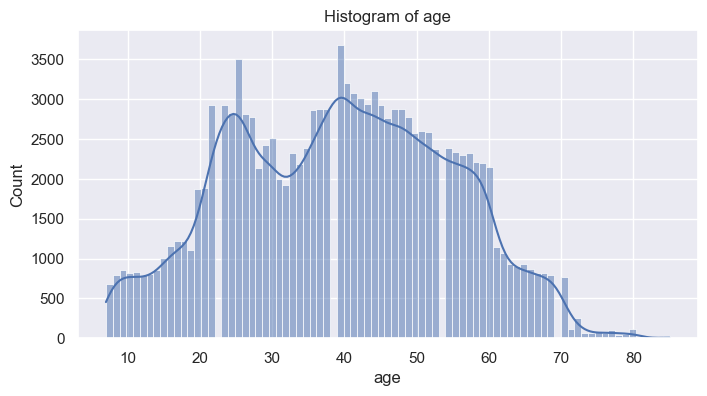

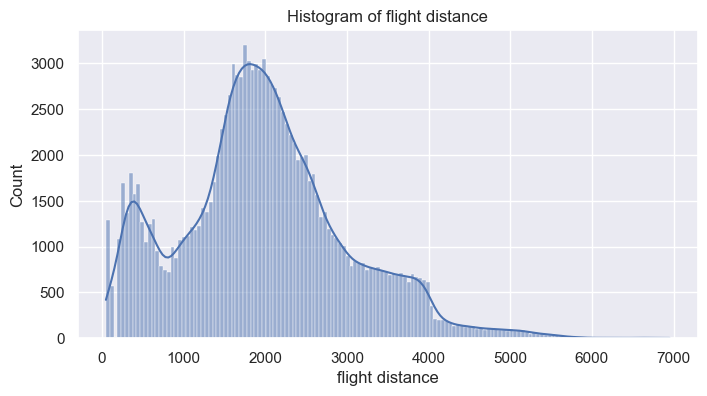

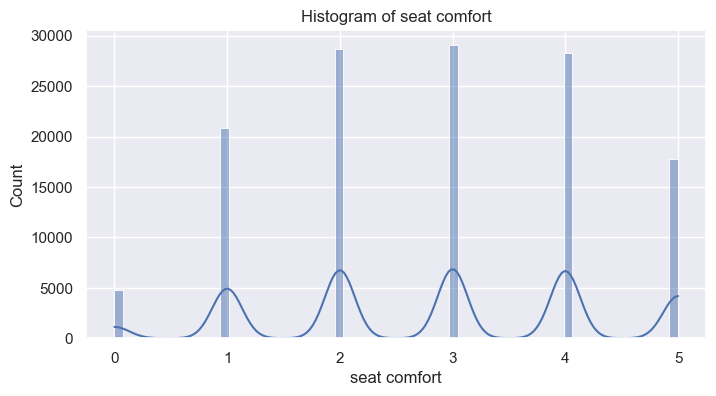

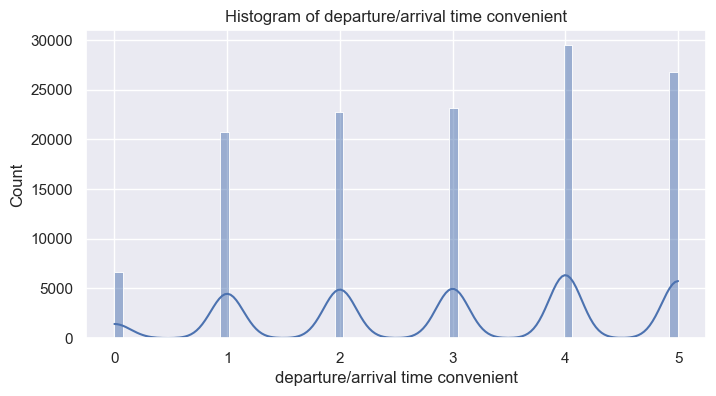

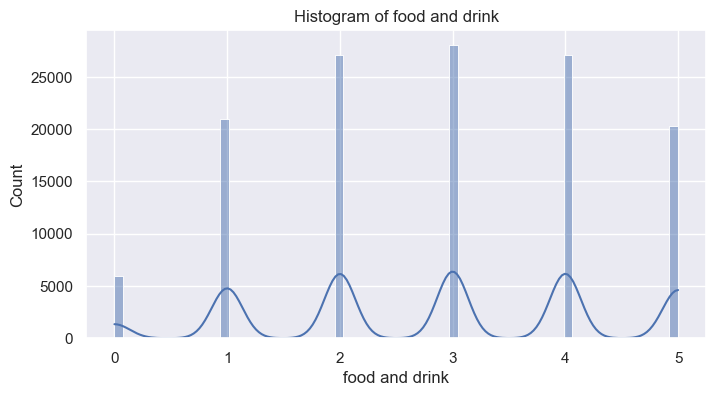

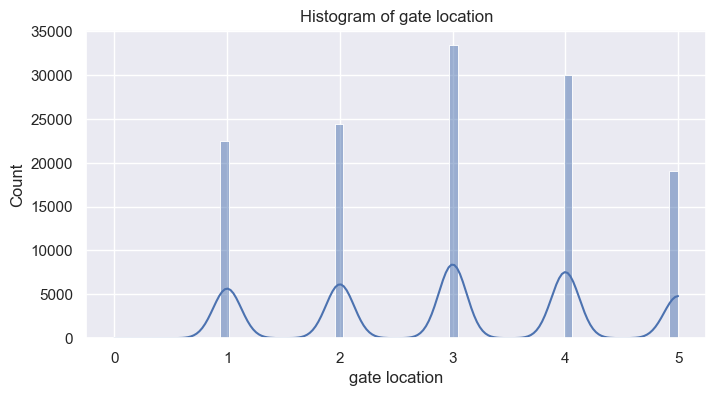

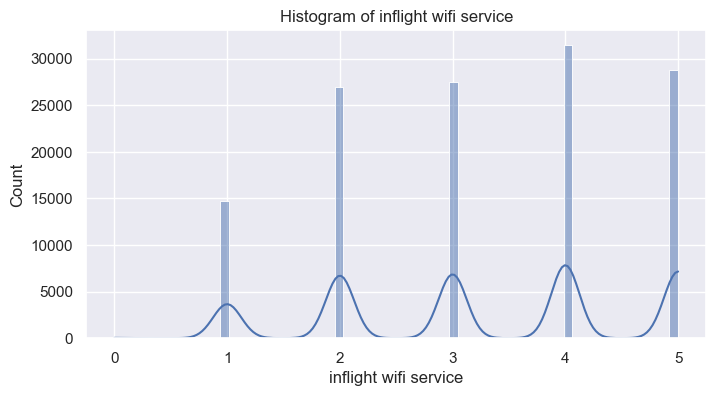

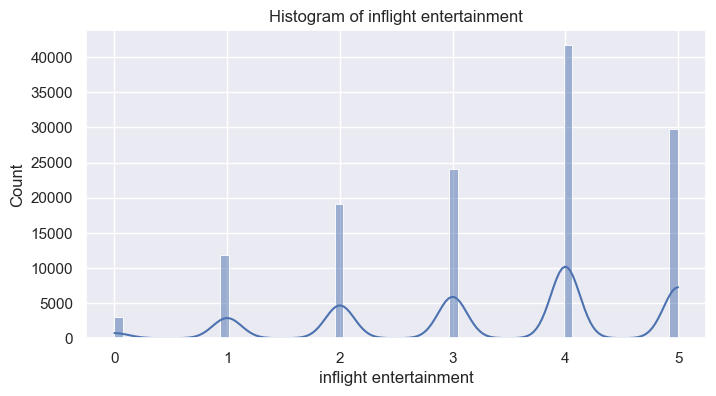

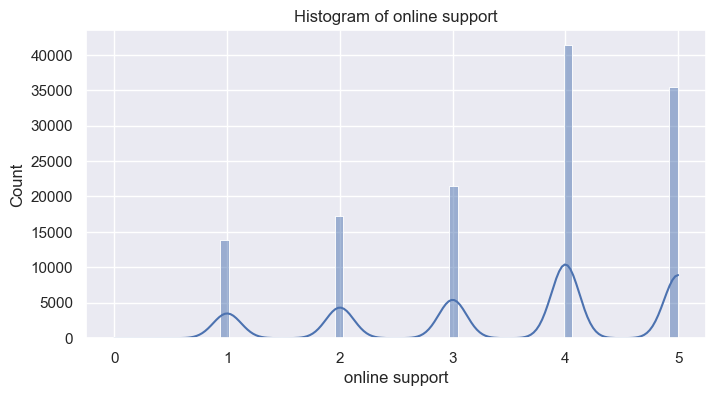

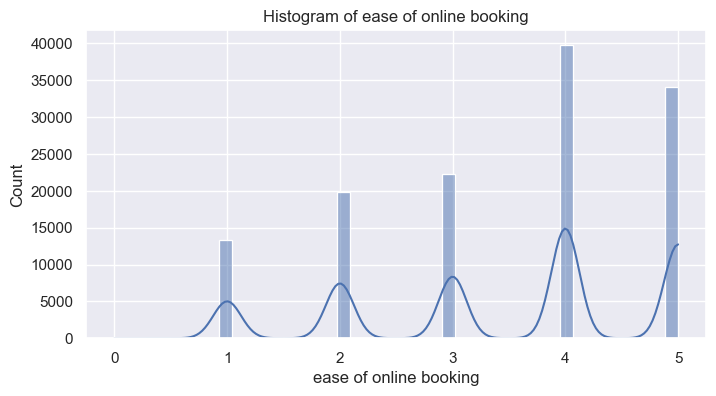

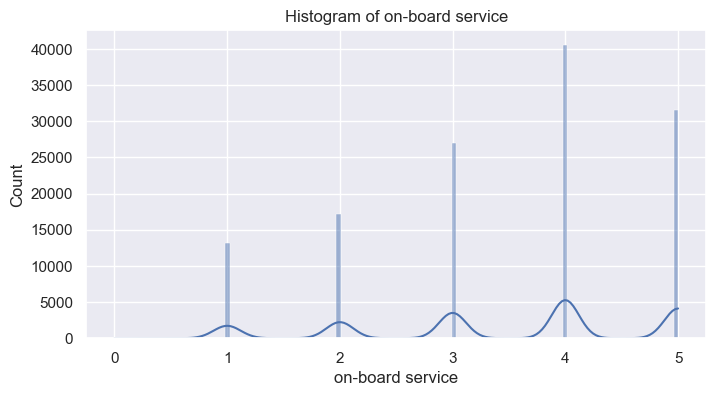

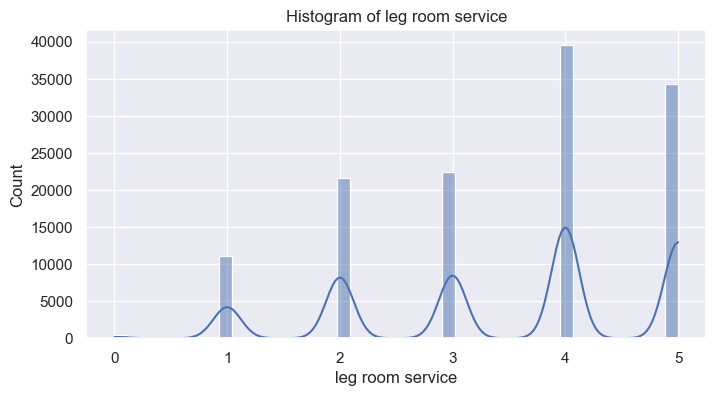

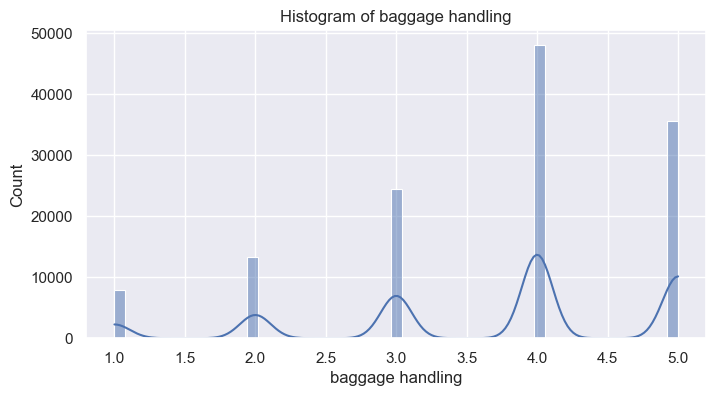

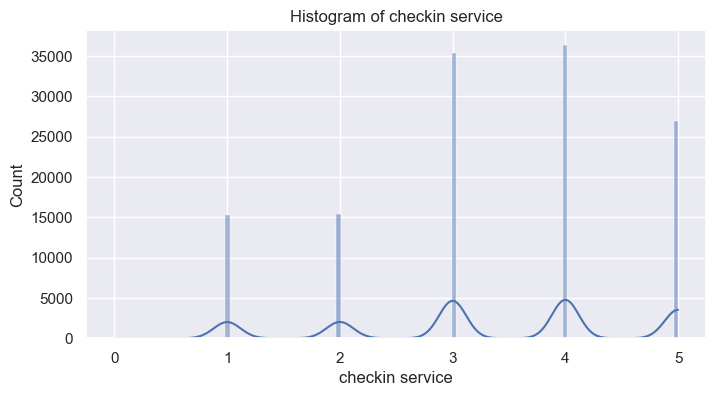

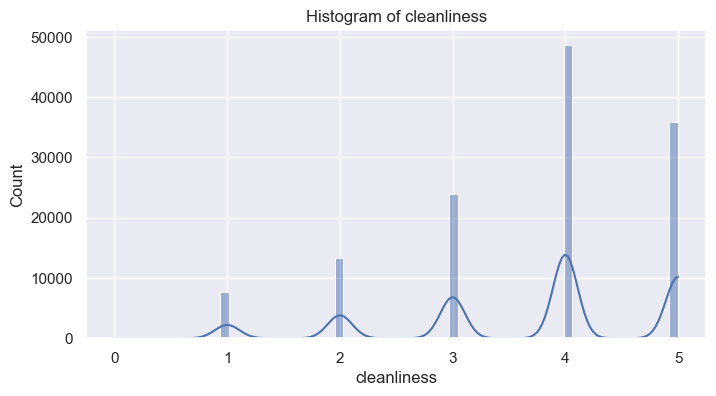

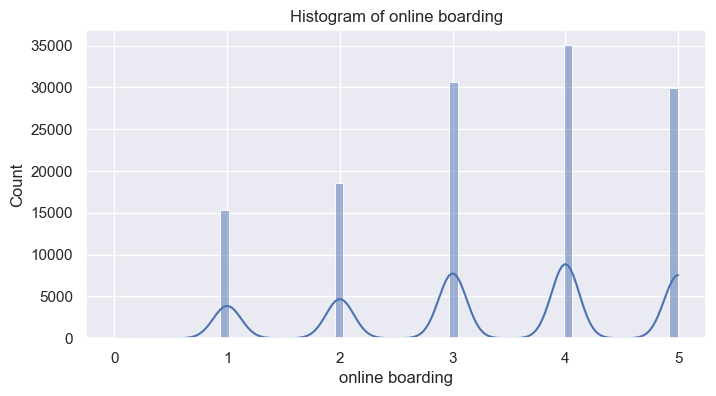

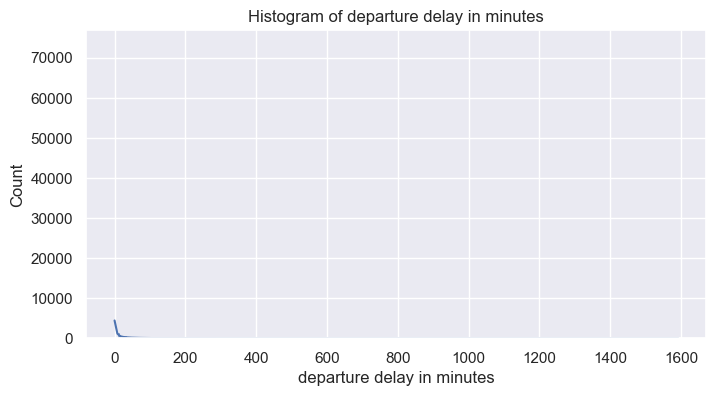

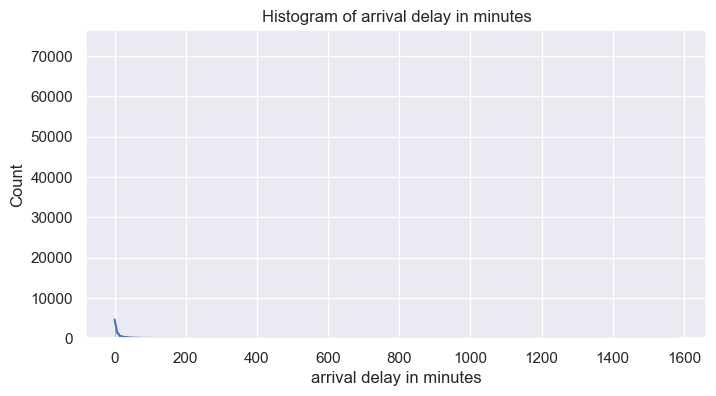

In [103]:
#plotting histogram to check distribution of the features
numerical_columns=df.select_dtypes(include=['int','float']).columns

for column in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(x=column,data=df,kde=True)
    plt.title('Histogram of ' + column)

plt.show()

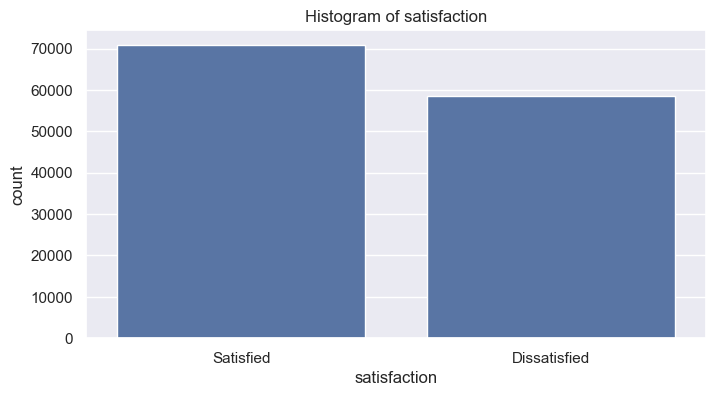

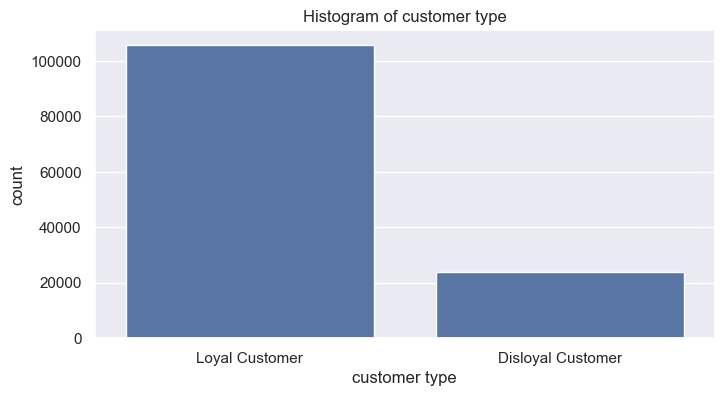

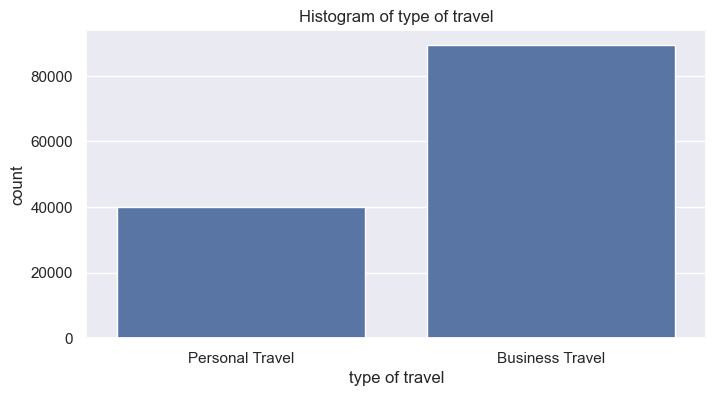

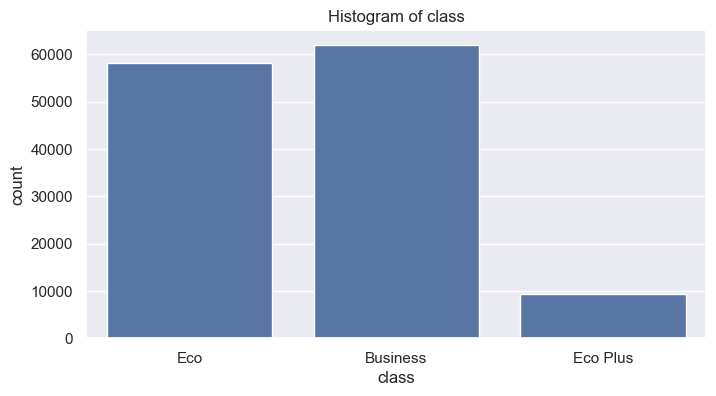

In [105]:
#plotting histogram to check distribution of the feature
categorical_columns=df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=column,data=df)
    plt.title('Histogram of ' + column)

plt.show()

### Convert the categorical column satisfaction into numeric

Convert the categorical column satisfaction into numeric through one-hot encoding.

In [107]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['satisfaction']=le.fit_transform(df['satisfaction'])

In [114]:
df['satisfaction'].value_counts()

satisfaction
1    70882
0    58605
Name: count, dtype: int64

In [174]:
#Creating training and testing data

X=df[['inflight entertainment']]
y=df['satisfaction']

In [175]:
#Spliting train test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Model Building

In [176]:
#importing required model packages
from sklearn.linear_model import LogisticRegression
#Build model
model=LogisticRegression()

In [177]:
#Build a logistic regression model and fit the model to the training data.
clf=model.fit(X_train,y_train)

In [178]:
#obtaining parameters from the model
clf.coef_

array([[0.99752883]])

In [179]:
clf.intercept_

array([-3.19359054])

<Axes: xlabel='inflight entertainment', ylabel='satisfaction'>

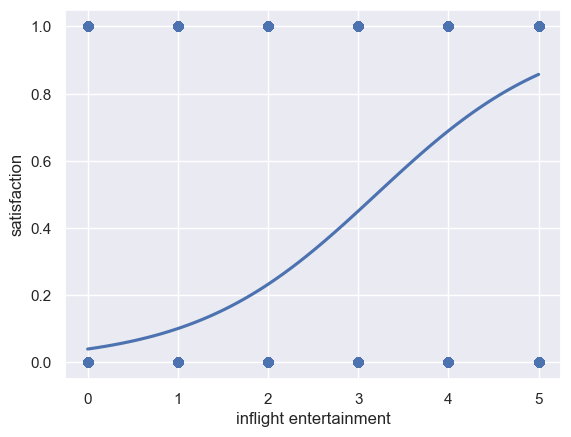

In [180]:
#Plotting the model
sns.regplot(x='inflight entertainment', y="satisfaction", data=df, logistic=True, ci=None)


In [181]:
y_pred = clf.predict(X_test)


In [182]:
print(y_pred)

[1 0 0 ... 0 0 0]


In [183]:
clf.predict_proba(X_test)

array([[0.14257646, 0.85742354],
       [0.55008251, 0.44991749],
       [0.89989529, 0.10010471],
       ...,
       [0.89989529, 0.10010471],
       [0.76826369, 0.23173631],
       [0.55008251, 0.44991749]])

In [184]:
import sklearn.metrics as metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827


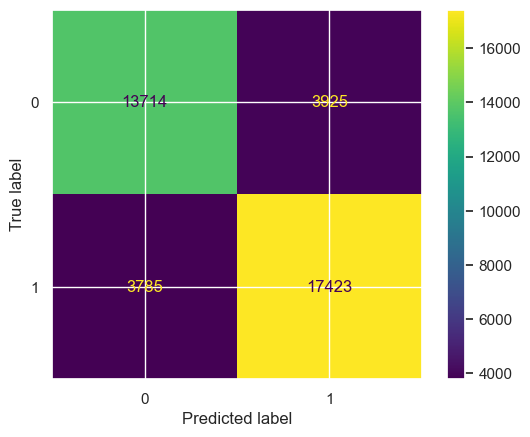

In [173]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()